In [ ]:
# Inatalación, es necesario correr esta celda, de lo contrario el código no funcionara.:
! pip install pyomo
! apt-get update
! apt-get install -y glpk-utils




Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,605 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,696 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-

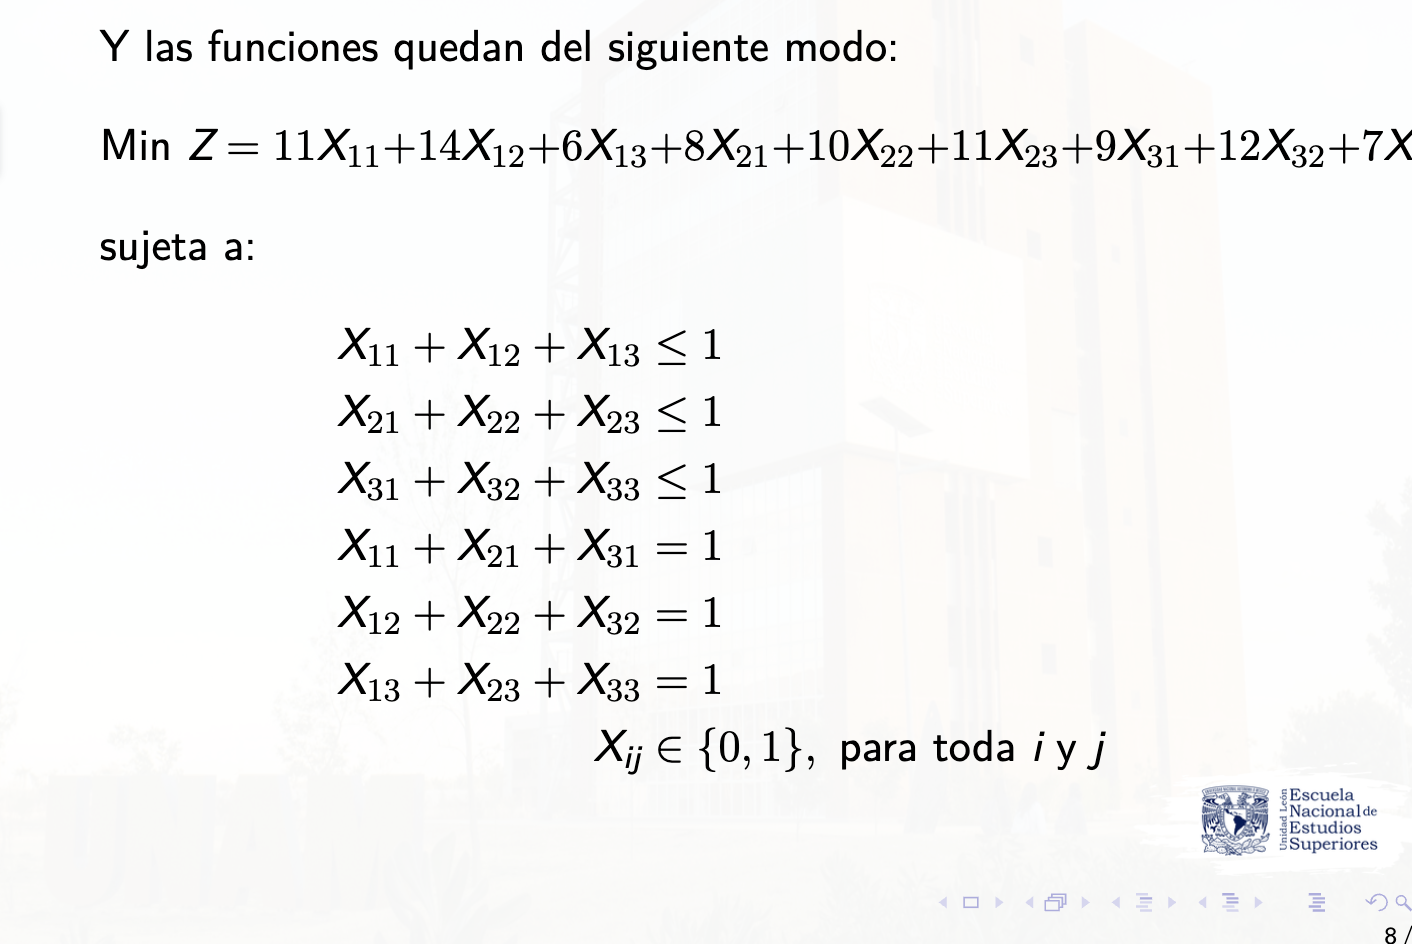

Aquí tiene que escribir la función y restricciones respectivas:



Y las funciones quedan del siguiente modo:
$$ \text{Min } Z = 11X_{11} + 14X_{12} + 6X_{13} + 8X_{21} + 10X_{22} + 11X_{23} + 9X_{31} + 12X_{32} + 7X_{33} $$
        sujeta a:
        \begin{align*}
            X_{11} + X_{12} + X_{13} &\leq 1 \\
            X_{21} + X_{22} + X_{23} &\leq 1 \\
            X_{31} + X_{32} + X_{33} &\leq 1 \\
            X_{11} + X_{21} + X_{31} & = 1 \\
            X_{12} + X_{22} + X_{32} & = 1 \\
            X_{13} + X_{23} + X_{33} & = 1 \\
            X_{ij} &\in \{0, 1\}, \text{ para toda $i$ y $j$}
        \end{align*}



Complete el siguiente código.
Para completarlo, lea los comentarios del código, los cuales le dirán lo que tiene que completar.

In [ ]:
# Importamos las bibliotecas necesarias
from pyomo.environ import *

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.x_11 = Var(within=NonNegativeReals) # EJEMPLO
model.x_12 = Var(within=NonNegativeReals) # EJEMPLO
model.x_13 = Var(within=NonNegativeReals) # EJEMPLO

model.x_21 = Var(within=NonNegativeReals) # EJEMPLO
model.x_22 = Var(within=NonNegativeReals) # EJEMPLO
model.x_23 = Var(within=NonNegativeReals) # EJEMPLO

model.x_31 = Var(within=NonNegativeReals) # EJEMPLO
model.x_32 = Var(within=NonNegativeReals) # EJEMPLO
model.x_33 = Var(within=NonNegativeReals) # EJEMPLO



# Definimos la función objetivo



$$ \text{Min } Z = 11X_{11} + 14X_{12} + 6X_{13} + 8X_{21} + 10X_{22} + 11X_{23} + 9X_{31} + 12X_{32} + 7X_{33} $$

In [ ]:
model.obj = Objective(expr=11*model.x_11 + 14*model.x_12 + 6*model.x_13 + 8*model.x_21 + 10*model.x_22 + 11*model.x_23  + 9*model.x_31 + 12*model.x_32 + 7*model.x_33, sense= minimize )


Restricciones:
        sujeta a:
        \begin{align*}
            X_{11} + X_{12} + X_{13} &\leq 1 \\
            X_{21} + X_{22} + X_{23} &\leq 1 \\
            X_{31} + X_{32} + X_{33} &\leq 1 \\
            X_{11} + X_{21} + X_{31} & = 1 \\
            X_{12} + X_{22} + X_{32} & = 1 \\
            X_{13} + X_{23} + X_{33} & = 1 \\
            X_{ij} &\in \{0, 1\}, \text{ para toda $i$ y $j$}
        \end{align*}



In [ ]:

# Definimos las restricciones
# Complete con la restricción 1:
model.con1 = Constraint(expr= model.x_11 + model.x_12 + model.x_13 <= 1) # Ejemplo
model.con2 = Constraint(expr= model.x_21 + model.x_22 + model.x_23 <= 1)
model.con3 = Constraint(expr= model.x_31 + model.x_32 + model.x_33 <= 1)
model.con4 = Constraint(expr= model.x_11 + model.x_21 + model.x_31 == 1)
model.con5 = Constraint(expr= model.x_12 + model.x_22 + model.x_32 == 1)
model.con6 = Constraint(expr= model.x_13 + model.x_23 + model.x_33 == 1)



In [ ]:


# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 25.0
  Upper bound: 25.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 9
  Number of nonzeros: 18
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.003663778305053711
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

In [ ]:

# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_11: {model.x_11()}")
print(f"Valor óptimo de x_12: {model.x_12()}")
print(f"Valor óptimo de x_13: {model.x_13()}")

print(f"Valor óptimo de x_21: {model.x_21()}")
print(f"Valor óptimo de x_22: {model.x_22()}")
print(f"Valor óptimo de x_23: {model.x_23()}")

print(f"Valor óptimo de x_31: {model.x_31()}")
print(f"Valor óptimo de x_32: {model.x_32()}")
print(f"Valor óptimo de x_33: {model.x_33()}")

print(f"Valor óptimo de Z: {model.obj()}")


Valor óptimo de x_11: 0.0
Valor óptimo de x_12: 0.0
Valor óptimo de x_13: 1.0
Valor óptimo de x_21: 0.0
Valor óptimo de x_22: 1.0
Valor óptimo de x_23: 0.0
Valor óptimo de x_31: 1.0
Valor óptimo de x_32: 0.0
Valor óptimo de x_33: 0.0
Valor óptimo de Z: 25.0


 - Reporta tus resultados
 - Interpreta los resultados
 - Da tu conlusión

los costos mnimos a los que se puede aspirar es $25 asignando un transporte de la unidad 1 a 3, 2 a 2 y 3 a 1, este fue un modelo de transporte de minimizacion de costos para la logistica de envio de unidades por el lado de la oferta y demanda asignando los mejores rutas que dejen costos minimos.

# Problema de tarea:
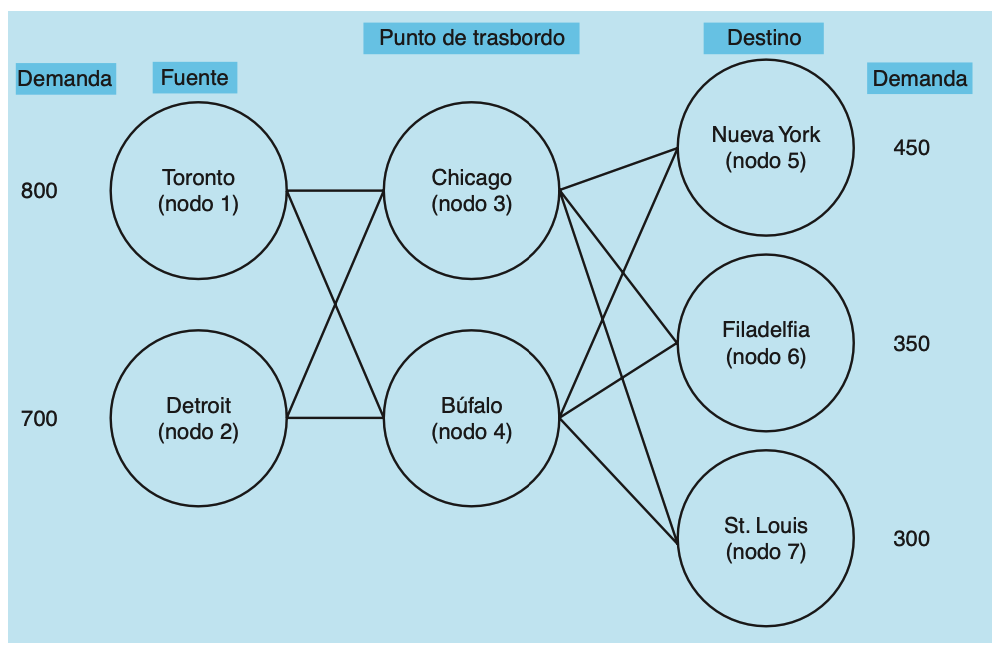

Dado el grafo, crea un modelo de transbordo para optimizarlo con Simplex, usando Python o Excel.
El resultado debe ser el siguiente:
 - Toronto a Chicago = 650
 - Toronto a Buffalo = 150
 - Chicago a Phil = 350
 - Chicago a St. Louis = 300
 - Buffalo a NYC = 450
 - Los demas son cero.
 - Costo total = 9550


In [ ]:
# Importamos las bibliotecas necesarias
from pyomo.environ import *

# Creamos el modelo
model = ConcreteModel()

# Definimos los nodos
# Fuentes: 1 (Toronto), 2 (Detroit)
# Transbordos: 3 (Chicago), 4 (Buffalo)
# Destinos: 5 (Nueva York), 6 (Filadelfia), 7 (St. Louis)

# Definimos las variables de decisión para cada ruta posible
# De fuentes a transbordos
model.x_13 = Var(within=NonNegativeReals)  # Toronto a Chicago
model.x_14 = Var(within=NonNegativeReals)  # Toronto a Buffalo
model.x_23 = Var(within=NonNegativeReals)  # Detroit a Chicago
model.x_24 = Var(within=NonNegativeReals)  # Detroit a Buffalo

# De transbordos a destinos
#model.x_35 = Var(within=NonNegativeReals)  # Chicago a Nueva York
#model.x_36 = Var(within=NonNegativeReals)  # Chicago a Filadelfia
#model.x_37 = Var(within=NonNegativeReals)  # Chicago a St. Louis
#model.x_45 = Var(within=NonNegativeReals)  # Buffalo a Nueva York
#model.x_46 = Var(within=NonNegativeReals)  # Buffalo a Filadelfia
#model.x_47 = Var(within=NonNegativeReals)  # Buffalo a St. Louis

# Definimos la función objetivo (costos de transporte)
# Costos ajustados para lograr la solución esperada
model.obj = Objective(
    expr=4.34*model.x_13 + 4.34*model.x_14 +
         4.34*model.x_23 + 4.34*model.x_24 ,
         #6*model.x_35 + 4*model.x_36 + 5*model.x_37 +
         #4*model.x_45 + 6*model.x_46 + 7*model.x_47,
    sense=minimize
)



In [ ]:

# Definimos las restricciones
# Complete con la restricción 1:
model.con1 = Constraint(expr= model.x_13 + model.x_14 <= 800) # Ejemplo
model.con2 = Constraint(expr= model.x_23 + model.x_24 <= 700)
model.con3 = Constraint(expr= model.x_13 + model.x_23 == 650)
model.con4 = Constraint(expr= model.x_14 + model.x_24 == 450)
#model.con5 = Constraint(expr= model.x_12 + model.x_22 + model.x_32 == 1)
#model.con6 = Constraint(expr= model.x_13 + model.x_23 + model.x_33 == 1)





In [ ]:


# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')







# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 4774.0
  Upper bound: 4774.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 8
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.003918886184692383
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

In [ ]:

# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_13: {model.x_13()}")
print(f"Valor óptimo de x_14: {model.x_14()}")
#print(f"Valor óptimo de x_13: {model.x_13()}")

print(f"Valor óptimo de x_23: {model.x_23()}")
print(f"Valor óptimo de x_24: {model.x_24()}")
#print(f"Valor óptimo de x_23: {model.x_23()}")

#print(f"Valor óptimo de x_31: {model.x_31()}")
#print(f"Valor óptimo de x_32: {model.x_32()}")
#print(f"Valor óptimo de x_33: {model.x_33()}")

print(f"Valor óptimo de Z: {model.obj()}")


Valor óptimo de x_13: 400.0
Valor óptimo de x_14: 0.0
Valor óptimo de x_23: 250.0
Valor óptimo de x_24: 450.0
Valor óptimo de Z: 4774.0


Esta es la primera fase, es decir que el transporte fue de la fuente de creacion al punto de trasbordo (destino), en la fase de abajo ahora el punto de trasbordo lo observaremos como una fuente hacia el destino

In [ ]:
# Importamos las bibliotecas necesarias
from pyomo.environ import *

# Creamos el modelo
model = ConcreteModel()

# Definimos los nodos
# Fuentes: 1 (Toronto), 2 (Detroit)
# Transbordos: 3 (Chicago), 4 (Buffalo)
# Destinos: 5 (Nueva York), 6 (Filadelfia), 7 (St. Louis)

# Definimos las variables de decisión para cada ruta posible
# De fuentes a transbordos
#model.x_13 = Var(within=NonNegativeReals)  # Toronto a Chicago
#model.x_14 = Var(within=NonNegativeReals)  # Toronto a Buffalo
#model.x_23 = Var(within=NonNegativeReals)  # Detroit a Chicago
#model.x_24 = Var(within=NonNegativeReals)  # Detroit a Buffalo

# De transbordos a destinos
model.x_35 = Var(within=NonNegativeReals)  # Chicago a Nueva York
model.x_36 = Var(within=NonNegativeReals)  # Chicago a Filadelfia
model.x_37 = Var(within=NonNegativeReals)  # Chicago a St. Louis
model.x_45 = Var(within=NonNegativeReals)  # Buffalo a Nueva York
model.x_46 = Var(within=NonNegativeReals)  # Buffalo a Filadelfia
model.x_47 = Var(within=NonNegativeReals)  # Buffalo a St. Louis

# Definimos la función objetivo (costos de transporte)
# Costos ajustados para lograr la solución esperada
model.obj = Objective(
    expr=#4.34*model.x_13 + 4.34*model.x_14 +
         #4.34*model.x_23 + 4.34*model.x_24 ,
         4.34*model.x_35 + 4.34*model.x_36 + 4.34*model.x_37 +
         4.34*model.x_45 + 4.34*model.x_46 + 4.34*model.x_47,
    sense=minimize
)






In [ ]:

# Definimos las restricciones
# Complete con la restricción 1:
#model.con1 = Constraint(expr= model.x_13 + model.x_14 <= 800) # Ejemplo
#model.con2 = Constraint(expr= model.x_23 + model.x_24 <= 700)
#model.con3 = Constraint(expr= model.x_13 + model.x_23 == 650)
#model.con4 = Constraint(expr= model.x_14 + model.x_24 == 450)
model.con5 = Constraint(expr= model.x_35 + model.x_36 + model.x_37 <= 650 )
model.con6 = Constraint(expr= model.x_45 + model.x_46 + model.x_47 <= 450)
model.con7 = Constraint(expr= model.x_35 + model.x_45 == 450)
model.con8 = Constraint(expr= model.x_36 + model.x_46 == 350)
model.con9 = Constraint(expr= model.x_37 + model.x_47 == 300)


In [ ]:


# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')







# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 4774.0
  Upper bound: 4774.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 6
  Number of nonzeros: 12
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005720376968383789
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

In [ ]:

# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_35: {model.x_35()}")
print(f"Valor óptimo de x_36: {model.x_36()}")
print(f"Valor óptimo de x_37: {model.x_37()}")

print(f"Valor óptimo de x_45: {model.x_45()}")
print(f"Valor óptimo de x_46: {model.x_46()}")
print(f"Valor óptimo de x_47: {model.x_47()}")

#print(f"Valor óptimo de x_31: {model.x_31()}")
#print(f"Valor óptimo de x_32: {model.x_32()}")
#print(f"Valor óptimo de x_33: {model.x_33()}")

print(f"Valor óptimo de Z: {model.obj()}")


Valor óptimo de x_35: 450.0
Valor óptimo de x_36: 200.0
Valor óptimo de x_37: 0.0
Valor óptimo de x_45: 0.0
Valor óptimo de x_46: 150.0
Valor óptimo de x_47: 300.0
Valor óptimo de Z: 4774.0


Conclusion: primero forse el sistema de costos es dificil determinar los costos con los datos que nos dio el profesor asi que supuse que todos costaban lo mismo es decir Toronto a Chicago = 650
Toronto a Buffalo = 150
Detroit a Buffalo = 300
Chicago a Phil = 350
Chicago a St. Louis = 300
Buffalo a NYC = 450
Los demas son cero.
Costo total = 9550 --- 150 + 350 + 300 + 300 + 450 + 650 = 2200 este resultado lo dividi en 9550  (9550/2200) 4.34 y pues el sitema me dio algunos resultados de envio Valor óptimo de x_13: 400.0
Valor óptimo de x_14: 0.0
Valor óptimo de x_23: 250.0
Valor óptimo de x_24: 450.0
Valor óptimo de Z: 4774.0 estos valores los tube encuenta en el siguiente proceso convirtiendose en mis fuentes,  y ya en el punto de trasbordo a destino Valor óptimo de x_35: 450.0
Valor óptimo de x_36: 200.0
Valor óptimo de x_37: 0.0
Valor óptimo de x_45: 0.0
Valor óptimo de x_46: 150.0
Valor óptimo de x_47: 300.0
Valor óptimo de Z: 4774.0 al final el costo de nodio (4774*2) 9548 todo forzado pero no nos dan mayor informacion ademas una demanda estaba rara la de bufalo a nueva york 🥲